<a href="https://colab.research.google.com/github/dev-nanthan/KNN_Classifier/blob/main/MLA1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT Required Packages and Required Train and Test Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Try to Load the data from repo url
path_train_sDat = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/train.sDAT.csv"
path_test_sDat = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/test.sDAT.csv"
path_train_sNC = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/train.sNC.csv"
path_test_sNC = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/test.sNC.csv"
path_plot = "https://github.com/dev-nanthan/KNN_Classifier/blob/4204c19bb231a8652b7a4704f953aeff5467092c/2D_grid_points.csv"

#train_sNC = pd.read_csv(path_train_sNC)
#train_sDAT = pd.read_csv(path_train_sDat)
#test_sNC = pd.read_csv(path_test_sNC)
#test_sDAT = pd.read_csv(path_test_sDat)

# use local session files for now

train_sNC = pd.read_csv("train.sNC.csv")
train_sDAT = pd.read_csv("train.sDAT.csv")
test_sNC = pd.read_csv("test.sNC.csv")
test_sDAT = pd.read_csv("test.sDAT.csv")



### **Format Train Data: Concat sDAT next to sNC**

In [12]:

# Train Data is costructed as Pandas Dataframe objects (2D Datastructure) 
train_data = pd.concat([train_sNC, train_sDAT], ignore_index=True)
print("Train Data Size:", len(train_data))
#print(train_data)
train_labels = np.concatenate([np.zeros(len(train_sNC)), np.ones(len(train_sDAT))])
print("Train Label Size",len(train_labels))
#print(train_labels)


Train Data Size: 474
Train Label Size 474


### **Format Test Data: Concat sDAT next to sNC**

In [13]:
# Test Data is costructed as Pandas Dataframe objects (2D Datastructure) 
test_data = pd.concat([test_sNC, test_sDAT], ignore_index=True)
print("Test Data Size:", len(test_data))
#print(test_data)
test_labels = np.concatenate([np.zeros(len(test_sNC)), np.ones(len(test_sDAT))])
print("Test Label Size",len(test_labels))
#print(test_labels)

Test Data Size: 200
Test Label Size 200


### **For Given K options Fit the classifier using Euclidean Distance**

In [65]:
K_vals = [1,3,5,10,20,30,50,100,150,200]

# List to store the Results produced by Each Models
results = []

# List to store each models of diff K values
KNN = []

for i, k in enumerate(K_vals):
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  KNN.append(knn)
  KNN[i].fit(train_data, train_labels)
  train_accuracy = KNN[i].score(train_data, train_labels)
  test_accuracy = KNN[i].score(test_data, test_labels)

  train_error = 1 - train_accuracy
  test_error = 1 - test_accuracy
  print("k={}, Train accuracy={:.2f}, Test accuracy={:.2f}".format(k, train_accuracy, test_accuracy))
  d_temp = {"K":k, "train_accuracy":train_accuracy, "test_accuracy": test_accuracy,
            "train_error":train_error, "test_error":test_error}
  results.append(d_temp)

# Get the Best Performing K value based on Test_Accuracy
opt_i = 0;
temp_max = 0;
for i, r in enumerate(results):
  if (r["test_accuracy"]>temp_max):
    opt_i = i
    temp_max = r["test_accuracy"]
    #print (r)


print("Optimum Results:", results[opt_i])

OPT_K = results[opt_i]["K"]
OPT_Mod = KNN[opt_i]

print("Optimum K:", OPT_K)
print("Optimum Model:", OPT_Mod)


k=1, Train accuracy=1.00, Test accuracy=0.78
k=3, Train accuracy=0.86, Test accuracy=0.80
k=5, Train accuracy=0.84, Test accuracy=0.83
k=10, Train accuracy=0.85, Test accuracy=0.83
k=20, Train accuracy=0.83, Test accuracy=0.83
k=30, Train accuracy=0.83, Test accuracy=0.84
k=50, Train accuracy=0.84, Test accuracy=0.81
k=100, Train accuracy=0.80, Test accuracy=0.80
k=150, Train accuracy=0.81, Test accuracy=0.81
k=200, Train accuracy=0.78, Test accuracy=0.80
Optimum Results: {'K': 30, 'train_accuracy': 0.8312236286919831, 'test_accuracy': 0.84, 'train_error': 0.16877637130801693, 'test_error': 0.16000000000000003}
Optimum K: 30
Optimum Model: KNeighborsClassifier(metric='euclidean', n_neighbors=30)


### Plot the Grid Points and Classify the boundary based on simple given Rule

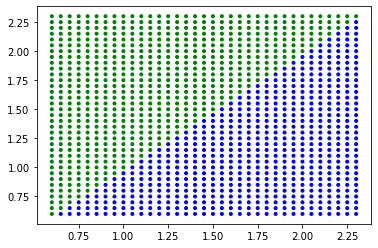

In [55]:
grid_df = pd.read_csv("2D_grid_points.csv")
#print(grid_df)

r1 = grid_df['R1']
r2 = grid_df['R2']

# Assign the class labels for the provided Grid points.
# Assign Criteria: y` = 0 when R1<R2, y` = 1 when R1>=R2.
g_y = (r1>r2).astype(int)

# Create scatter plot of grid points with assigned classes
fig, ax = plt.subplots()
colors = ListedColormap(['green', 'blue'])
ax.scatter(r1, r2, c=g_y, cmap=colors, marker='.')

# Draw Contour through the class boundary using meshgrid, Contour - Not Done yet
R1, R2 = np.meshgrid(r1, r2)
Y = (R1>R2).astype(int)
#ax.contour(R1, R2, Y, levels=[0.5], colors='black')

plt.show()


### Plot the Classification for the Optimum K along with Grid points predicted with Same K Value

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


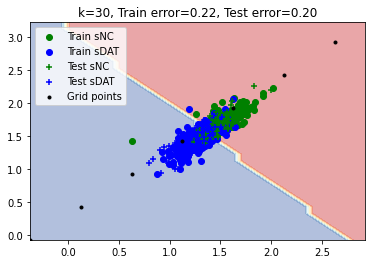

In [18]:
x_min, x_max = train_data.iloc[:, 0].min() - 1, train_data.iloc[:, 0].max() + 1
y_min, y_max = train_data.iloc[:, 1].min() - 1, train_data.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

plt.scatter(train_sNC.iloc[:, 0], train_sNC.iloc[:, 1], c='g', marker='o', label='Train sNC')
plt.scatter(train_sDAT.iloc[:, 0], train_sDAT.iloc[:, 1], c='b', marker='o', label='Train sDAT')
plt.scatter(test_sNC.iloc[:, 0], test_sNC.iloc[:, 1], c='g', marker='+', label='Test sNC')
plt.scatter(test_sDAT.iloc[:, 0], test_sDAT.iloc[:, 1], c='b', marker='+', label='Test sDAT')
plt.scatter(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5), c='k', marker='.', label='Grid points')
plt.title("k={}, Train error={:.2f}, Test error={:.2f}".format(OPT_K, 1-train_accuracy, 1-test_accuracy))
plt.legend(loc='upper left')
plt.show()

